<a href="https://colab.research.google.com/github/pvanik1/FastAI/blob/master/Practice_apparel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Made for the Analytics Vidhya practice problem: https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/

In [9]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *
from fastai.callbacks.hooks import *

Updating fastai...
Done.


In [0]:
pwd

'/content'

In [0]:
from google.colab import files
files.upload()

Saving test_ScVgIM0.zip to test_ScVgIM0.zip
Saving train_LbELtWX.zip to train_LbELtWX.zip


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train_LbELtWX.zip', 'r')
zip_ref.extractall('')
zip_ref.close()
zip_ref = zipfile.ZipFile('test_ScVgIM0.zip', 'r')
zip_ref.extractall('')
zip_ref.close()

In [0]:
import os
path = Path(os.getcwd())

In [11]:
print(path)

/content


In [12]:
df = pd.read_csv(path/'train.csv', header='infer')
df.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [13]:
tfms = get_transforms(do_flip = True, flip_vert = False, max_rotate = 0, max_zoom = 1, max_lighting = None, max_warp = 0.0, p_affine = 0.0, p_lighting = 0.0)
print(tfms)

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True), RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True)], [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])


In [14]:
path = path/'train'
print(path)

/content/train


In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=28, suffix='.png')

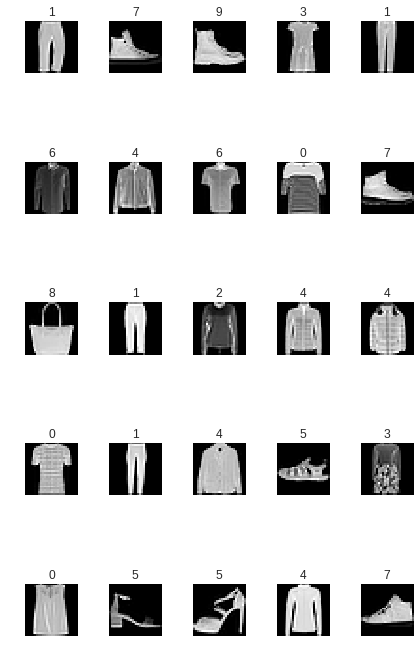

In [17]:
data.show_batch(rows=5, figsize=(6,10))

In [18]:
learn = create_cnn (data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 92078720.33it/s]


In [19]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.744206,0.622510,0.228167,01:28
1,0.510056,0.445813,0.165750,01:17
2,0.429347,0.355251,0.131833,01:17
3,0.374776,0.328761,0.119667,01:17
4,0.342661,0.318700,0.116917,01:17


In [0]:
learn.save('F')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


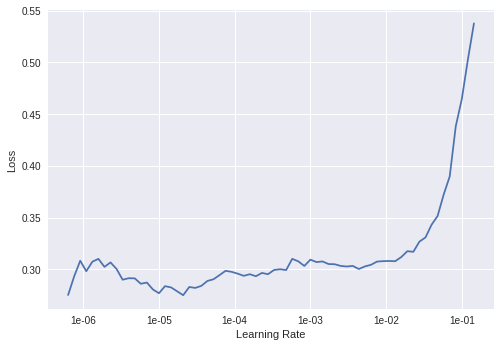

In [24]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(2e-06,1.5e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.281505,0.283926,0.103833,01:45
1,0.268571,0.271938,0.101833,01:43
2,0.267822,0.266229,0.099167,01:44
3,0.234671,0.259383,0.097000,01:43
4,0.222847,0.259304,0.095417,01:43


In [36]:
learn.save(Path(os.getcwd())/'F-unfrozen', return_path=True)

PosixPath('/content/F-unfrozen.pth')

In [0]:
learn.export(Path(os.getcwd())/'F-unfrozen.pkl')

Begin inference and file writing

In [40]:
img = open_image(os.getcwd()+'/test/'+'60007'+'.png')
img

In [43]:
print(learn.predict(img)[0])

2


In [0]:
import csv
with open('submission.csv', mode='w') as file:
  writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  writer.writerow(['id', 'label'])

  input = pd.read_csv('test.csv', header='infer')
  for index,row in input.iterrows():
    imageId = (row['id'])
    img = open_image(os.getcwd()+'/test/'+str(imageId)+'.png')
    pred_class = learn.predict(img)[0]
    writer.writerow([imageId,pred_class])
file.close()